**STEP - 1 : IMPORT REQUIRED LIBRARIES**

In [747]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

! pip install xlrd
! pip install pandas openpyxl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

**STEP - 2 : LOAD THE DATASET**

In [748]:
data_path = r"C:\Users\titik\OneDrive\Desktop\titanic3.xls"
data = pd.read_excel(data_path)
data.shape

(1309, 14)

There are 1309 rows and 14 columns

**STEP - 3 : CLEAN THE DATASET**

In [749]:
data = data.drop(['boat', 'body'], axis = 1)
data.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO"


In [750]:
data = data.rename(columns = {'pclass' : 'PClass', 'survived' : 'Survived', 'name' : 'Name', 'sex' : 'Sex',
                  'age' : 'Age', 'sibsp' : 'Sibsp', 'parch' : 'Parch', 'ticket' : 'Ticket', 'fare' : 'Fare',
                  'cabin' : 'Cabin', 'embarked' : 'Embarked', 'home.dest' : 'Home Destination'})
data.head(1)

,PClass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home Destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO"


In [751]:
data.info() # Print The Information Of Features In Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PClass            1309 non-null   int64  
 1   Survived          1309 non-null   int64  
 2   Name              1309 non-null   object 
 3   Sex               1309 non-null   object 
 4   Age               1046 non-null   float64
 5   Sibsp             1309 non-null   int64  
 6   Parch             1309 non-null   int64  
 7   Ticket            1309 non-null   object 
 8   Fare              1308 non-null   float64
 9   Cabin             295 non-null    object 
 10  Embarked          1307 non-null   object 
 11  Home Destination  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


We can observe 1309 rows of all features except Age, Cabin and Home Destination, this difference needs to be treated.

In [752]:
data.isna().sum() # Check For Any Null Values

PClass                 0
Survived               0
Name                   0
Sex                    0
Age                  263
Sibsp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin               1014
Embarked               2
Home Destination     564
dtype: int64

Some features have missing values which needs to be removed

In [753]:
# Use Imputation Method To Drop Null Values And Drop Cabin, Name, Ticket As Well As Home Destination Features
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
ml_data = data.drop(['Name', 'Ticket', 'Cabin', 'Home Destination'], axis = 1)

ml_data.isna().sum() # Check For Any Null Values

PClass      0
Survived    0
Sex         0
Age         0
Sibsp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Thus, we don't have any null values present in dataset now

In [754]:
ml_data.head(3)

,PClass,Survived,Sex,Age,Sibsp,Parch,Fare,Embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S


In [755]:
ml_data.shape

(1309, 8)

**STEP - 4 : PERFORM FEATURE ENGINEERING**

In [756]:
# Perform OneHotEncoding In Order To Convert Categorical Features To Numerical Features (Sex & Embarked In This Case)
# Categorical Features Results To Errors While Developing Model
# Sex ( 0 : Male, 1 : Female) 
# Embarked ( C : 0, Q : 1, S : 2)
# These Numerical Values Have Been Assigned To Categorical Values For Sex And Embarked Features

ml_data['Sex'] = ml_data['Sex'].astype('category').cat.codes
ml_data['Embarked'] = ml_data['Embarked'].astype('category').cat.codes
data.head(2)

,PClass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home Destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


**STEP - 5 : BUILD AND TEST THE LOGISTIC REGRESSION MODEL**

In [757]:
# Generate Train & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(ml_data.drop('Survived', axis = 1), ml_data['Survived'])

In [758]:
# Develope The Model
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [759]:
# Test The Model
Y_pred = LogReg.predict(X_test) 

In [760]:
# Evaluate The Model : Print Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       197
           1       0.77      0.76      0.76       131

    accuracy                           0.81       328
   macro avg       0.81      0.80      0.81       328
weighted avg       0.81      0.81      0.81       328



1. The accuracy score of model is : 74%
2. There is room for improving accuracy upon implementing GridSearchCSV model

**STEP - 6 : HYPERTUNE AND TEST THE MODEL**

In [761]:
# Define The Parameters
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.25, 0.025, 0.0025, 0.00025], 
    'max_iter': [50, 100, 150, 200, 250, 300]             
}

In [762]:
# Develope The Model
grid_search = GridSearchCV(estimator=LogReg, param_grid=param_grid, cv=5, scoring='accuracy', 
                           verbose=2, n_jobs=-1)

In [763]:
# Develope The Model
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.25, 0.025, 0.0025,
                               0.00025],
                         'max_iter': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=2)

In [764]:
# Evaluate The Model : Print Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       197
           1       0.77      0.76      0.76       131

    accuracy                           0.81       328
   macro avg       0.81      0.80      0.81       328
weighted avg       0.81      0.81      0.81       328



Accuracy Of Hypertuned Model Is : 74%

*Since Accuracy Of Hypertuned Model Is Tied With Accuracy Of Regular Model But Hypertuned Logistic Regression Model Is Tuned With Different Parameters, We Will Proceed With Predictions Of Hypertuned Logistic Regression Model*

**STEP - 7 : COMPUTE PREDICTORS SURVIVAL PERCENTAGE**

In [765]:
Y_train_pred = cross_val_predict(grid_search, X_train, Y_train, cv = 5)
precision_score(Y_train, Y_train_pred)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\titik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7259036144578314

Precision Score Of Model Is : 72.60%

**Step By Step Computation Of Survivors Percentage**

Step - 1 : Extract Support From Classification Report
    
    1. Non - Survivors = 197
    2. Survivors = 131

Step - 2 : Calculate Total Number Of Samples

    Total Number Of Samples = 197 + 131
                            = 328

Step - 3 : Calculate Survivors And Non - Survivors Percentage

    Non - Survivor's Percentage = (197/328) * 100
                          = 60.00%

    Survivor's Percentage = (131/328) * 100
                                = 40.00%     

**STEP - 8 : PLOT SURVIVORS DEMOGRAPHICS GRAPH**

C:\Users\titik\AppData\Local\Temp\ipykernel_19384\536518553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Survived', data=data, palette='hls')


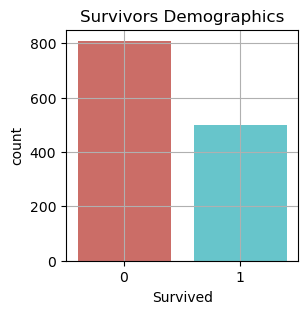

In [771]:
plt.figure(figsize=(3, 3))
sb.countplot(x='Survived', data=data, palette='hls')
plt.title('Survivors Demographics')
plt.grid()
plt.show()

**STEP - 9 : COMPARE THE RESULTS**

1. Non - Survivor's Percentage : 60.00%
2. Survivor's Percentage : 40.00%

Approximately 40% Survived In The Titanic Accident Based On The Given Dataset